<a href="https://colab.research.google.com/github/yazfir/Projects2021/blob/master/Probabilidad/DistribucionBinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np                            # Librería para manejo de Matrices y Arreglos
from numpy.random import binomial             # Generador aleatorio de números basado en la distribución binomial
from scipy.stats import binom                 # Nos permite implementar la función binomial rápidamente
from math import factorial                    # Librería general para funciones matemáticas
import matplotlib.pyplot as plt               # Sirve para desarrollar visualizaciones

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$


In [3]:
def fac(x):
  return factorial(x)

In [4]:
def my_binomial(k,n,p):
  return fac(n) / ( fac(k) * fac(n-k) ) * ( p**k * (1-p)**(n-k) )

In [5]:
my_binomial(2,3,0.5)

0.375

In [6]:
3/8.0

0.375

In [7]:
dist = binom(3,0.5)
dist.pmf(2) #Probability Mass Function (pmf)

0.375

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

* K=0
$$
    \frac{3!}{ 0! (3-0)!} (1/2)^0 (1-1/2)^{3-0} = \frac{6}{(1)(6)} (1)(1/8) = \frac{1}{8}
$$

* K=1
$$
    \frac{3!}{ 1! (3-1)!} (1/2)^1 (1-1/2)^{3-1} = \frac{6}{(1)(2)} (1/2)(1/4) = \frac{6}{16} = \frac{3}{8}
$$

* K=2
$$
    \frac{3!}{ 2! (3-2)!} (1/2)^2 (1-1/2)^{3-2} = \frac{6}{(2)(1)} (1/4)(1/2) = \frac{6}{16} = \frac{3}{8}
$$

  
<br/><br/>


$$
\sum \left[ \frac{1}{8} + \frac{3}{8} + \frac{3}{8} \right] = \frac{7}{8}
$$

In [8]:
dist.cdf(2) #Cumulative Distribution Function (Distribución Acumulada)

0.875

In [9]:
7/8

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [20]:
# Simulación con 100 lanzamientos de moneda equilibrada
# Nota.- Ejecutar esta celda varias veces para observar la variación en los resultados.

p=0.5
n=3
binomial(n,p)

0

In [36]:
arr = []
for _ in range(25):
  arr.append(binomial(n,p))

arr

[1, 2, 0, 3, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1]

In [37]:
np.unique(arr, return_counts=True)  # Hace un conteo de cuantas repeticiones se tienen en 'arr'

(array([0, 1, 2, 3]), array([ 3,  8, 13,  1]))

In [38]:
np.unique(arr, return_counts=True)[1]/len(arr)    # Se obtiene todas las probabilidades del 2do arreglo [1] --->> Simulada

array([0.12, 0.32, 0.52, 0.04])

In [39]:
[binom(3,0.5).pmf(k) for k in [0,1,2,3]]          # Se obtiene todas las probabilidades de k  ----->> Teórica (tipo frecuentista)

[0.12500000000000003, 0.375, 0.375, 0.12500000000000003]

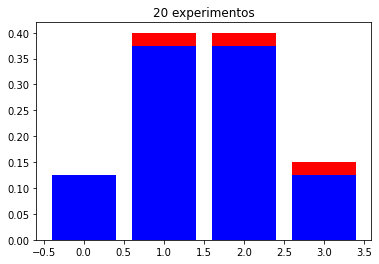

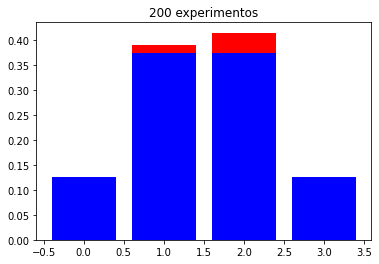

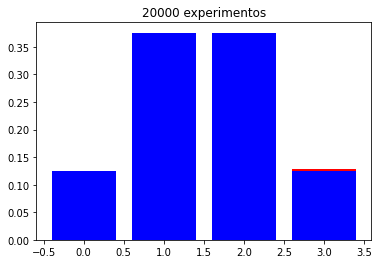

In [42]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(n,p))
  sim = np.unique(arr, return_counts=True)[1]/len(arr)
  teorica = [binom(3,0.5).pmf(k) for k in values]
  plt.bar(values, sim, color = 'red')
  plt.bar(values, teorica, color = 'blue')
  #plt.bar(values, teorica, alpha=0.5, color='blue')  # Alpha es el grado de transparencia
  plt.title(f'{num_trials} experimentos')
  plt.show()

plot_hist(20); plot_hist(200); plot_hist(20000)